The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Initial cost= 6.855370998 W= -0.21580517 b= 0.1949317
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0001 cost= 2.127434492 W= 0.028802559 b= 0.23008724
Epoch: 0100 cost= 0.090435147 W= 0.31752318 b= 0.33168316
Epoch: 0200 cost= 0.087522380 W= 0.30998752 b= 0.38510758
Epoch: 0300 cost= 0.085237764 W= 0.30331373 b= 0.4324219
Epoch: 0400 cost= 0.083445854 W= 0.29740322 b= 0.47432473
Epoch: 0500 cost= 0.082040384 W= 0.29216868 b= 0.5114353
Epoch: 0600 cost= 0.080938041 W= 0.28753278 b= 0.5443016
Epoch: 0700 cost= 0.080073416 W= 0.28342715 b= 0.57340884
Epoch: 0800 cost= 0.079395

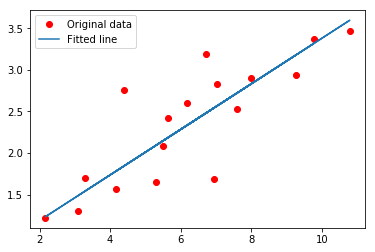

In [1]:
from __future__ import absolute_import, division, print_function
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

import tensorflow as tf



# Set Eager API

tf.enable_eager_execution()

tfe = tf.contrib.eager



# Training Data

train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,

           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]

train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,

           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]

n_samples = len(train_X)



# Parameters

learning_rate = 0.01

display_step = 100

num_steps = 1000



# Weight and Bias

W = tfe.Variable(np.random.randn())

b = tfe.Variable(np.random.randn())





# Linear regression (Wx + b)

def linear_regression(inputs):

    return inputs * W + b





# Mean square error

def mean_square_fn(model_fn, inputs, labels):

    return tf.reduce_sum(tf.pow(model_fn(inputs) - labels, 2)) / (2 * n_samples)





# SGD Optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)

# Compute gradients

grad = tfe.implicit_gradients(mean_square_fn)



# Initial cost, before optimizing

print("Initial cost= {:.9f}".format(

    mean_square_fn(linear_regression, train_X, train_Y)),

    "W=", W.numpy(), "b=", b.numpy())



# Training

for step in range(num_steps):



    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))



    if (step + 1) % display_step == 0 or step == 0:

        print("Epoch:", '%04d' % (step + 1), "cost=",

              "{:.9f}".format(mean_square_fn(linear_regression, train_X, train_Y)),

              "W=", W.numpy(), "b=", b.numpy())



# Graphic display

plt.plot(train_X, train_Y, 'ro', label='Original data')

plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')

plt.legend()

plt.show()